# Autoencoder

## Build Autoencoder

In [251]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

In [252]:
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.0-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.2
GPU is available


In [253]:
# Load the original data 
import numpy as np
original_train = np.load('/Users/xinyu/Downloads/Training data/unedited_train_data.npy')

In [254]:
print(original_train)

[[[[ 44  37  37]
   [ 44  38  40]
   [ 40  35  38]
   ...
   [ 68  43  27]
   [216 143 107]
   [245 183 139]]

  [[ 43  35  35]
   [ 43  35  38]
   [ 38  33  35]
   ...
   [ 65  39  26]
   [213 137 103]
   [244 182 138]]

  [[ 35  30  29]
   [ 36  31  30]
   [ 37  32  32]
   ...
   [ 62  36  25]
   [209 132  99]
   [243 180 138]]

  ...

  [[ 34  31  32]
   [ 35  31  32]
   [ 39  32  35]
   ...
   [106 115 115]
   [ 63  68  80]
   [105  65  64]]

  [[ 37  31  30]
   [ 38  32  31]
   [ 39  33  32]
   ...
   [133 139 144]
   [ 73  80  98]
   [ 97  62  64]]

  [[ 39  32  32]
   [ 40  33  33]
   [ 44  35  34]
   ...
   [149 151 160]
   [ 81  87 108]
   [ 93  56  59]]]


 [[[ 55  61  64]
   [ 56  62  66]
   [ 58  61  65]
   ...
   [ 89 107 123]
   [ 83 105 120]
   [ 82 105 114]]

  [[ 52  58  59]
   [ 54  60  62]
   [ 56  60  63]
   ...
   [ 90 107 130]
   [ 86 103 122]
   [ 93 112 123]]

  [[ 52  57  59]
   [ 55  61  62]
   [ 57  62  65]
   ...
   [ 84 101 123]
   [ 86  96 108]
   [ 95 109

In [255]:
print(original_train.shape)

(95460, 32, 32, 3)


In [256]:
original_train =original_train.astype('float32')/255.0 

In [257]:
max_value = np.max(original_train)
min_value = np.min(original_train)
print("Maximum pixel value:", max_value)
print("Minimum pixel value:", min_value)

Maximum pixel value: 1.0
Minimum pixel value: 0.0


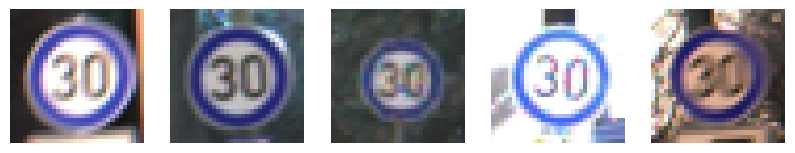

In [258]:
num_images = 5
images = original_train[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

In [259]:
# Load the data with noise added
noisy_train = np.load('/Users/xinyu/Downloads/noisy_training.npy')

In [260]:
print(noisy_train)

[[[[0.94509291 0.96072069 0.9134108 ]
   [0.79577509 1.         0.85024139]
   [0.97882846 0.97563394 0.85039027]
   ...
   [0.89050754 1.         0.87407183]
   [0.98919572 1.         0.95115111]
   [0.92072082 0.97342284 0.91186438]]

  [[0.97284576 0.95586043 0.90373644]
   [0.9390784  1.         0.89121266]
   [0.9491018  0.97018584 0.78276212]
   ...
   [0.9506112  1.         0.89834631]
   [0.94126845 1.         0.97375394]
   [0.84459862 1.         0.95365493]]

  [[0.93913914 0.99784681 0.92527942]
   [0.88305785 0.99252652 0.93041087]
   [0.91000618 0.89614722 0.93729248]
   ...
   [0.92749181 0.9124723  0.97213496]
   [0.99101137 0.94199754 0.89991337]
   [0.95389765 1.         0.94087955]]

  ...

  [[0.76710226 1.         0.93201475]
   [0.9308711  0.85684552 0.80611415]
   [0.95110664 1.         0.84233801]
   ...
   [0.86131573 0.97872846 0.93909401]
   [0.95706232 0.99481219 0.88331919]
   [0.87159059 1.         0.95504079]]

  [[0.89674333 0.90826828 0.87364126]
   [1. 

In [261]:
# Find the range of pixel values in the image data
max_value = np.max(noisy_train)
min_value = np.min(noisy_train)
print("Maximum pixel value:", max_value)
print("Minimum pixel value:", min_value)

Maximum pixel value: 1.0
Minimum pixel value: 0.0


In [262]:
# Calculate the mean and standard deviation of the pixel values
pixel_mean = np.mean(noisy_train)
pixel_std = np.std(noisy_train)

print("Pixel mean:", pixel_mean)
print("Pixel standard deviation:", pixel_std)

Pixel mean: 0.5106262173898898
Pixel standard deviation: 0.25190882925364866


In [263]:
# Get the shape of the data
print(noisy_train.shape)

(95460, 32, 32, 3)


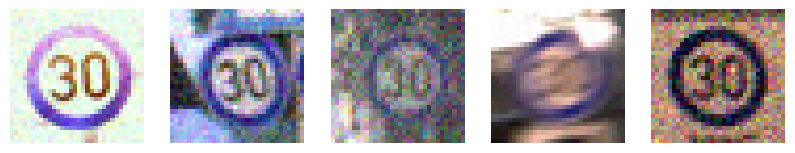

In [264]:
num_images = 5
images = noisy_train[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

In [265]:
# Split the data into training and testing sets
#
n_original = original_train.shape[0]
n_train = int(n_original * 0.9)
n_test = n_original - n_train

x_train_noisy = noisy_train[:n_train]
x_train_original = original_train[:n_train]
x_test_noisy = noisy_train[n_train:]
x_test_original = original_train[n_train:]

In [266]:
print(n_original)
print(n_train)
print(n_test)

95460
85914
9546


In [267]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [268]:
# Encoder
input_shape = (32, 32, 3)
input_img = Input(shape=input_shape)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (1, 1), activation='relu', padding='same')(x)


In [269]:
# LATENT SPACE
latentSize = (4,4,32)

In [270]:
# Decoder
direct_input = Input(shape=latentSize)
x = Conv2D(192, (1, 1), activation='relu', padding='same')(direct_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [271]:
# Define the model
encoder = Model(input_img, encoded)
decoder = Model(direct_input, decoded)
autoencoder = Model(input_img, decoder(encoded))

autoencoder.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_94 (Conv2D)          (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 16, 16, 96)        41568     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 8, 8, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 8, 8, 192)         166

In [272]:
# Compile the model
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

## Train Autoencoder

In [273]:
# Train the model
autoencoder.fit(x_train_noisy, x_train_original, epochs=5)

Epoch 1/5
2685/2685 [==============================] - 138s 51ms/step - loss: 0.6703
Epoch 2/5
2685/2685 [==============================] - 137s 51ms/step - loss: 0.6463
Epoch 3/5
2685/2685 [==============================] - 137s 51ms/step - loss: 0.5994
Epoch 4/5
2685/2685 [==============================] - 137s 51ms/step - loss: 0.5789
Epoch 5/5
2685/2685 [==============================] - 1278s 476ms/step - loss: 0.5678


In [274]:
# save the trained model
autoencoder.save('denoising_autoencoder.h5')

## View Reconstruction

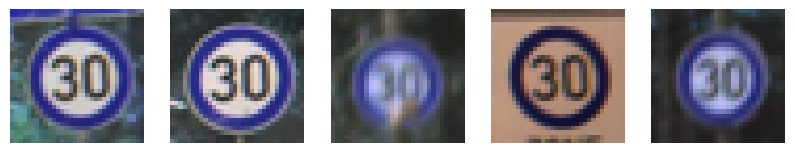

In [279]:
# Testing original images
num_images = 5
images = x_test_original[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

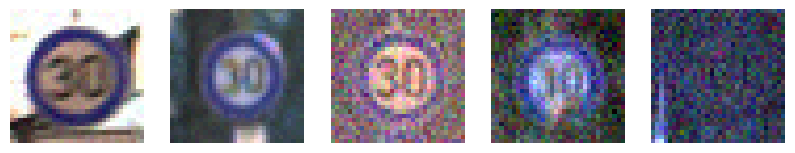

In [280]:
# Testing noisy images
num_images = 5
images = x_test_noisy[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

In [275]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [276]:
# Load the trained denoising autoencoder model
loaded_autoencoder = tf.keras.models.load_model('denoising_autoencoder.h5')

In [277]:
# Use the denoising autoencoder to reconstruct the testing data
test_reconstructed = loaded_autoencoder.predict(x_test_noisy)

299/299 [==============================] - 8s 26ms/step


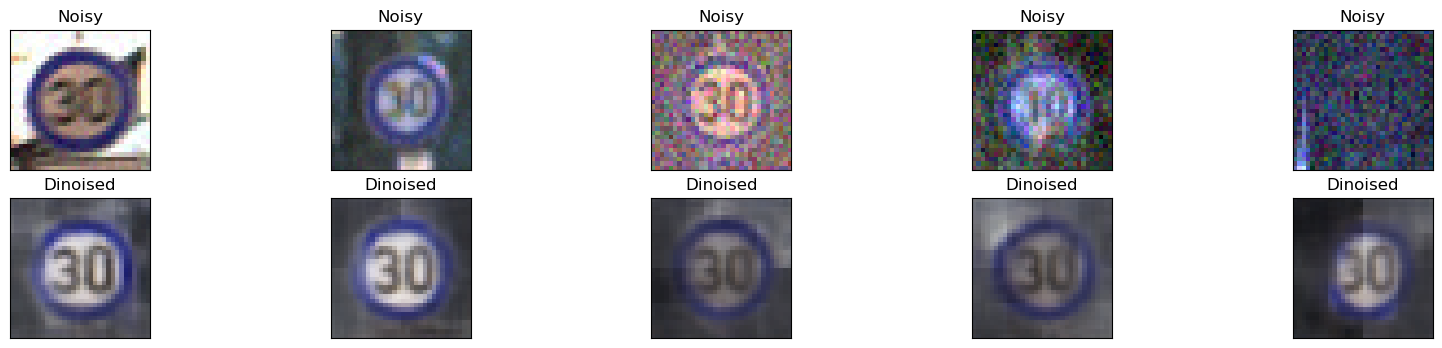

In [282]:
# Visualize the original testing data and the reconstructed data
n = 5  # Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(test_reconstructed[i])
    plt.title('Dinoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()